https://samuelkellum.github.io/FinalTutorial/

<h1 align='center'> Police Brutality in New Orleans </h1>
<h3> Ajit Alapati and Samuel Kellum </h3>

---

<h4>Table of contents:</h4>
<ol>
<li> Introduction </li>
<li> Extraction, Transform and Load </li>
<li> Exploratory Data Analysis and Data Visualization </li>
<li> Hypothesis Testing </li>
<li> Conclusion and Further Study </li>
</ol>

---

<h2 align='center'>1. Introduction </h2>
<br>
<p>Shortly following the death of George Floyd while in custody of the police, the topic of police brutality has gained a lot of attention across the United States. According to <a href='https://thelawdictionary.org/article/what-is-police-brutality/'>The Law Dictionary</a>, "Police brutality is the use of excessive and/or unnecessary force by police when dealing with civilians." Ever since George Floyd's death, there have been protests across the country calling to reform the police system. One of the biggest issues raised during these protests is that black people are disproportionately targeted by the police, and that police are more aggressive when encountering black people.</p>

<p>This issue is important in New Orleans becasue the city has a high proprtion of black people, almost 60% according to <a href='https://www.census.gov/quickfacts/fact/table/US,neworleanscitylouisiana/LND110210'>the US Census</a>, compared to about 13% nationally. Therefore, this issue of the police disproportionately targeting black people is a serious issue in our community.</p>

<p>For this project, we will be analyzing whether police interactions in New Orleans involving use of force disproportionately affect people of different ethnicities at different levels. For example, if race is not a factor in police interactions involving use of force, the distribution of ethnicities of these interactions should be similar to the population demographics.</p>
<p>Additionally, we will analyze for police interactions in New Orleans involving use of force, whether people of different races are more likely to get injured.</p>
<p>We will also compare the results in New Orleans to Austin and Orlando.</p>

<p>In this analysis, we will answer the following questions:</p>
<ul>
<li> Are black people in New Orleans more likely to be involved in police interactions involving use of force? </li>
<li> Are people more likely to be injured in police encounters involving use of force in Austin, New Orleans, or Orlando, regardless of race?</li>
<li> Is race a more significant factor in police interactions in New Orleans than in Austin or Orlando?</li>
</ul>

<p>The reason we are doing this analysis is to better understand cities' relationships to their local governments. Interactions with the police are important and can help define how a population relates to their government. We aim to analyze police violence in general, and then look more into the racial break down of police violence. If a discrepency is found among the data, we have then found an actionable pursuit for policymakers and lawyers to make. After the analysis, these policymakers will have somewhere to look for policy or social discrepencies. </p>

---

<h2 align='center'>2. Extraction, Transform and Load </h2>

<h4> Extraction and Load </h4>

The first thing we need to do is collect all of the data we want to use for this project. For this project, we will load three CSV files. Each CSV file contains information on the city police department's Use of Force or Response to Resistance. We will also extract census data from one URL containing demographic information on all three cities.

In the first block of code below, we are importing the libraries we will need for the project.

In [1]:
## Loading libraries
# Load Pandas
import pandas as pd

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

# Load Requests
import requests

# Load Scipy Stats
import scipy.stats as stats

The first dataset we want to load is a CSV file called <a href='https://data.nola.gov/Public-Safety-and-Preparedness/NOPD-Use-of-Force-Incidents/9mnw-mbde'>NOPD Use of Force Incidents</a>. This dataset represents each use of force incident by the New Orleans Police Department reported per NOPD Use of Force policy (starting in August 2016).

We can load a CSV file in Pandas by using ```pd.read_csv()```. After loading the file, we can display the head of the DataFrame before performing any transformation on the DataFrame.

In [2]:
nopd_df = pd.read_csv('../_data/NOPD_Use_Of_Force_Incidents.csv')
nopd_df.head()

,PIB File Number,Date Occurred,Originating Bureau,Division level,Division,Unit,Working Status,Shift,Investigation status,Disposition,...,Subject Ethnicity,Subject Age,Subject Build,Subject Height,Subject Injured,Subject Hospitalized,Subject Arrested,Subject Arrest Charges,Use of Force Reason,Officer Injured
0,FTN2016-0112,03/23/2016,FOB - Field Operations Bureau,7th District,Evening Watch,NaN,Unknown Working Status,Unknown Shift Hours,Initial,Pending,...,Black,38,NaN,NaN,No,Yes,No,NaN,refuse verbal commands,No
1,FTN2016-0169,03/26/2016,FOB - Field Operations Bureau,6th District,B Platoon,NaN,NaN,NaN,Completed,Use Of Force Authorized,...,Black,27,Small,5'4'' to 5'6'',No,Yes,Yes,NaN,Resisting Lawful Arrest,No
2,FTN2016-0172,03/26/2016,FOB - Field Operations Bureau,7th District,Evening Watch,Patrol,Unknown Working Status,Unknown Shift Hours,Completed,Use Of Force Authorized,...,Black,37,Medium,5'10'' to 6'0'',No,No,No,NaN,refuse verbal commands,No | No | No
3,FTN2016-0168,03/26/2016,FOB - Field Operations Bureau,8th District,Narcotics,NaN,NaN,NaN,Completed,Use Of Force Authorized,...,White | Black,29 | 33,Large | Large,6'1'' to 6'3'' | 6'1'' to 6'3'',Yes | Yes,No | No,Yes | Yes,NaN,Resisting Lawful Arrest,No | No | No | No
4,FTN2016-0173,03/27/2016,FOB - Field Operations Bureau,7th District,Day Watch,NaN,NaN,NaN,Completed,Use Of Force Authorized,...,White,23,Small,5'10'' to 6'0'',Yes,Yes,Yes,NaN,Resisting Lawful Arrest,No | No


The next two CSV files we want to load are <a href='https://data.austintexas.gov/Public-Safety/2018-Response-to-Resistance-Data/rus9-w6q5'>Austin Police Department Response to Resistance</a> and <a href='https://data.cityoforlando.net/Orlando-Police/OPD-Response-To-Resistance/ap4w-p9kt'>Orlando Police Department Response to Resistance</a>. Since almost all police response to resistance involves use of force, this data provides a the best comparison to the New Orleans Use of Force data.
To load these files, we do the same thing as above. Once again, we can display the heads of the DataFrame before any tidying.

In [3]:
austin_police_df = pd.read_csv('../_data/Austin_Response_To_Resistance.csv')
austin_police_df.head()

,RIN,Primary Key,Date Occurred,Time Occurred,Location,Area Command,Nature of Contact,Reason Desc,R2R Level,Master Subject ID,...,Weapon Used 5,Number Shots,Subject Effects,Effect on Officer,Officer Organization Desc,Officer Commission Date,Officer Yrs of Service,X-Coordinate,Y-Coordinate,CouncilDistrict
0,"154,619","201,510,652",01/01/2015 12:00:00 AM,0220,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,NaN,NaN,NO COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,GEORGE 600 REG I PATROL,05/17/2013 12:00:00 AM,2,"3,115,416","10,070,416",9.0
1,"154,620","201,510,652",01/01/2015 12:00:00 AM,0225,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,NaN,NaN,MINOR INJURY,NO COMPLAINT OF INJURY/PAIN,GEORGE 700 REG I PATROL,05/10/2002 12:00:00 AM,13,"3,115,416","10,070,416",9.0
2,"155,009","201,510,652",01/01/2015 12:00:00 AM,,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,NaN,NaN,NO COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,GEORGE 300 REG I PATROL,11/30/2012 12:00:00 AM,2,"3,115,416","10,070,416",9.0
3,"154,764","201,520,457",01/02/2015 12:00:00 AM,0943,1900 FARO DR,HE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,3.0,356649076: 201520457,...,NaN,NaN,COMPLAINT OF INJURY/PAIN,COMPLAINT OF INJURY/PAIN,HENRY 100 REG III PATROL,06/20/2008 12:00:00 AM,7,"3,124,262","10,057,181",3.0
4,"154,859","201,520,457",01/02/2015 12:00:00 AM,0943,1900 FARO DR,HE,DISPATCHED CALL,"IN CUSTODY, MAINTAINING CONTROL",3.0,356649076: 201520457,...,NaN,NaN,COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,HENRY 100 REG III PATROL,01/02/2009 12:00:00 AM,6,"3,124,262","10,057,181",3.0


In [4]:
orlando_police_df = pd.read_csv("../_data/OPD_Response_To_Resistance.csv")
orlando_police_df.head()

,Incident Number,Incident Date Time,Incident Location,Officers Involved,Officers Race,Officers Ethnicity,Officers Sex,Officer Battered,Officer Injured,Officer Medical Treatment,...,Offenders Involved,Offenders Race,Offenders Ethnicity,Offenders Sex,Offender Arrested,Offender Injured,Offender Medical Treatment,Witnesses Involved,Status,Location
0,2018-00079161,02/25/2018 10:23:00 PM,26TH / 15 LAWSONA BLV,1.0,W,NH,M,Yes,No,No,...,1.0,W,NH,M,Felony,Yes,Yes,0.0,Unmapped,NaN
1,2013-00544482,12/29/2013 11:02:00 PM,NaN,1.0,B,NH,M,No,No,No,...,0.0,U,NH,U,Not Arrested,No,No,0.0,Unmapped,NaN
2,2018-00478744,12/14/2018 08:17:00 AM,9200 Block of AIRPORT BV,1.0,W,NH,M,No,No,No,...,1.0,B,NH,M,Felony,No,No,0.0,Mapped,"(28.43097505, -81.31134146)"
3,2017-00316840,08/14/2017 01:50:00 AM,EW WBO / LONG ST,3.0,W;W;W,NH;NH;NH,M;M;M,No,No,No,...,1.0,B,NH,M,Misdemeanor,No,No,0.0,U,NaN
4,IncidentNumber,NaN,IncidentLocation,NaN,OfficersRace,OfficersEthnicity,OfficersSex,OfficerBattered,OfficerInjured,OfficerMedicalTreatment,...,NaN,OffendersRace,OffendersEthnicity,OffendersSex,OffenderArrested,OffenderInjured,OffenderMedicalTreatment,NaN,Status,NaN


Now that we have the police data, we now want to load census data containing racial demographic information for each city. One great feature of <a href='https://www.census.gov/'>census.gov</a> is that it allows users to compare multiple cities on a single table side-by-side. Not only can create a <a href='https://www.census.gov/quickfacts/fact/table/orlandocityflorida,neworleanscitylouisiana,austincitytexas/LND110210'>side-by-side table</a> to compare the racial demographics on the website, but we can easily extract this table from the URL into a Pandas DataFrame.

To do this, we can use ```requests.get()``` from the library we imported, to send a GET request (a request to get the information from a website) to the side-by-side table URL that we will pass as a paramater.

In [5]:
r = requests.get('https://www.census.gov/quickfacts/fact/table/orlandocityflorida,neworleanscitylouisiana,austincitytexas/LND110210')

To test that the GET request was successful, we can use ```r.status_code()```. If the status code is 200, that means the request has succeeded.

In [6]:
r.status_code

200

To load the side-by-side table into the URL, we can use ```pd.read_html()```, where we pass in the content of the URL. If we take the 2nd element (1st index) of the result, we will get the entire table from the website, which we can tidy in the next step.

In [7]:
demographic_df = pd.read_html(r.content)[1]
demographic_df.head(20)

,Population,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Population estimates, July 1, 2019, (V2019)",287442,390144,978908
1,"Population estimates base, April 1, 2010, (V2019)",238836,343828,801829
2,"Population, percent change - April 1, 2010 (es...",20.4%,13.5%,22.1%
3,"Population, Census, April 1, 2020",307573,383997,961855
4,"Population, Census, April 1, 2010",238300,343829,790390
5,Age and Sex,NaN,NaN,NaN
6,"Persons under 5 years, percent", 6.7%, 5.9%, 6.4%
7,"Persons under 18 years, percent", 21.1%, 20.1%, 20.4%
8,"Persons 65 years and over, percent", 10.2%, 14.1%, 8.9%
9,"Female persons, percent", 52.0%, 52.5%, 49.2%


<h4> Transformation </h4>

Now that we have extracted and loaded all of the data we need for this project, now we need to transform all of the data, by tidying it, to make it useful for the rest of the project.

We can first tidy the demographic DataFrame by keeping the rows that rows that relate to <b>Race and Hispanic Origin</b>, then renaming the columns. we will call the <b>Race and Hispanic Origin</b> column <b>Ethnicity</b> to remain consistent with the other websites.

In [8]:
demographic_df = demographic_df.loc[11:17].copy()
demographic_df = demographic_df.rename(columns={'Population' : 'Ethnicity', 'Unnamed: 1' : 'Orlando', 'Unnamed: 2' : 'New Orleans', 'Unnamed: 3' : 'Austin'})
demographic_df

,Ethnicity,Orlando,New Orleans,Austin
11,"White alone, percent", 61.3%, 33.9%, 72.6%
12,"Black or African American alone, percent(a)", 24.5%, 59.5%, 7.8%
13,"American Indian and Alaska Native alone, perce...", 0.2%, 0.2%, 0.7%
14,"Asian alone, percent(a)", 4.2%, 2.9%, 7.6%
15,Native Hawaiian and Other Pacific Islander alo..., 0.0%, 0.0%, 0.1%
16,"Two or More Races, percent", 3.5%, 1.9%, 3.5%
17,"Hispanic or Latino, percent(b)", 32.6%, 5.5%, 33.9%


Next, we need to remove the symbols in front of the numbers of each column. We can do this by slicing each cell in the city columns. The result is a clean looking DataFrame without the symbols.

In [9]:
demographic_df['Orlando'] = demographic_df['Orlando'].str[3:]
demographic_df['New Orleans'] = demographic_df['New Orleans'].str[3:]
demographic_df['Austin'] = demographic_df['Austin'].str[3:]

demographic_df

,Ethnicity,Orlando,New Orleans,Austin
11,"White alone, percent",61.3%,33.9%,72.6%
12,"Black or African American alone, percent(a)",24.5%,59.5%,7.8%
13,"American Indian and Alaska Native alone, perce...",0.2%,0.2%,0.7%
14,"Asian alone, percent(a)",4.2%,2.9%,7.6%
15,Native Hawaiian and Other Pacific Islander alo...,0.0%,0.0%,0.1%
16,"Two or More Races, percent",3.5%,1.9%,3.5%
17,"Hispanic or Latino, percent(b)",32.6%,5.5%,33.9%


We should next slice out the percent sign from each column, convert the numbers into numeric types, then divide the result by 100 to return each value into a proportion.

In [10]:
demographic_df['Orlando'] = demographic_df['Orlando'].str[:-1]
demographic_df['Orlando'] = pd.to_numeric(demographic_df['Orlando'])
demographic_df['Orlando'] = demographic_df['Orlando'] / 100

demographic_df['New Orleans'] = demographic_df['New Orleans'].str[:-1]
demographic_df['New Orleans'] = pd.to_numeric(demographic_df['New Orleans'])
demographic_df['New Orleans'] = demographic_df['New Orleans'] / 100

demographic_df['Austin'] = demographic_df['Austin'].str[:-1]
demographic_df['Austin'] = pd.to_numeric(demographic_df['Austin'])
demographic_df['Austin'] = demographic_df['Austin'] / 100

demographic_df

,Ethnicity,Orlando,New Orleans,Austin
11,"White alone, percent",0.613,0.339,0.726
12,"Black or African American alone, percent(a)",0.245,0.595,0.078
13,"American Indian and Alaska Native alone, perce...",0.002,0.002,0.007
14,"Asian alone, percent(a)",0.042,0.029,0.076
15,Native Hawaiian and Other Pacific Islander alo...,0.000,0.000,0.001
16,"Two or More Races, percent",0.035,0.019,0.035
17,"Hispanic or Latino, percent(b)",0.326,0.055,0.339


The last thing we should do to tidy this data is to map <b>Race and Hispanic Origin</b> into the following categories: Asian, Black, Hispanic, and White. We should do this because these are the categories for race/ethnicity in the Orlando DataFrame, whereas New Orleans and Austin provide more categories. Since Orlando has fewer categories for race/ethnicity than the rest of the data, we have to group the number of categories for race/ethnciity for the rest of the data. 

Since the city police data does not contain information on mixed individuals, we will exclude "Two of more races" from our demographic DataFrame. 

After mapping the Data, which will automatically any column we do not list as a key (in the mapping dictionary), we should use ```groupby()``` to group each of the categories, then sum the combined proprtions of each group. 

In [11]:
demographic_df["Ethnicity"] = demographic_df["Ethnicity"].map({
    'White alone, percent': 'White',
    'Black or African American alone, percent(a)': 'Black',
    'American Indian and Alaska Native alone, percent(a)': 'Asian',
    'Asian alone, percent(a)': 'Asian',
    'Native Hawaiian and Other Pacific Islander alone, percent(a)': 'Asian',
    'Hispanic or Latino, percent(b)': 'Hispanic'
})

demographic_df = demographic_df.groupby("Ethnicity").sum()

Lastly, we should normalize the values in our new categories so the proportions of each column add to 1.

In [12]:
demographic_df['Orlando'] = demographic_df['Orlando'] / demographic_df['Orlando'].sum()
demographic_df['New Orleans'] = demographic_df['New Orleans'] / demographic_df['New Orleans'].sum()
demographic_df['Austin'] = demographic_df['Austin'] / demographic_df['Austin'].sum()

Now we can move onto the CSV files for each city. For each city, although almost all of the columns are informative, there are way more columns than we plan on using. We can tidy the data by only keeping the columns we plan on using.

In [13]:
nopd_df = nopd_df[['Subject Ethnicity', 'Subject Injured']]
austin_police_df = austin_police_df[["Subject Race", "Subject Ethnicity", "Subject Effects"]]
orlando_police_df = orlando_police_df[["Offenders Race", "Offenders Ethnicity", "Offender Injured"]]

To keep Orlando consistent with New Orleans and Austin, we should rename the columns from <b>"Offender"</b> to <b>"Subject"</b>.

In [14]:
orlando_police_df = orlando_police_df.rename(columns={
    "Offenders Race": "Subject Race",
    "Offenders Ethnicity": "Subject Ethnicity",
    "Offender Injured": "Subject Injured"
})

Now we can look at the heads of the new DataFrames.

In [15]:
austin_police_df.head()

,Subject Race,Subject Ethnicity,Subject Effects
0,W,N,NO COMPLAINT OF INJURY/PAIN
1,W,N,MINOR INJURY
2,W,N,NO COMPLAINT OF INJURY/PAIN
3,W,N,COMPLAINT OF INJURY/PAIN
4,W,N,COMPLAINT OF INJURY/PAIN


In [16]:
orlando_police_df.head()

,Subject Race,Subject Ethnicity,Subject Injured
0,W,NH,Yes
1,U,NH,No
2,B,NH,No
3,B,NH,No
4,OffendersRace,OffendersEthnicity,OffenderInjured


In [17]:
nopd_df.head()

,Subject Ethnicity,Subject Injured
0,Black,No
1,Black,No
2,Black,No
3,White | Black,Yes | Yes
4,White,Yes


If you look at the row matching to index 3 for the NOPD DataFrame, you can tell that <b>Subject Ethnicity</b> is "White | Black" and <b>Subject Injured</b> is "Yes | Yes." This represents a NOPD Use of Force case involving two subjects. Where the first subject was white and was injured, and the second subject was black and injured. As shown below, there many rows involving more than two subjects.

In [18]:
nopd_df['Subject Ethnicity'].value_counts().head(10)

Black                                    1908
White                                     333
Black | Black                             183
Black | Black | Black                      66
Hispanic                                   56
Black | Black | Black | Black              35
White | White                              19
Asian                                      14
Black | Black | Black | Black | Black      13
Black | White                              11
Name: Subject Ethnicity, dtype: int64

We can write code to split rows with multiple subjects into separate rows by using ```.apply()```, which will apply the ```lamba``` function splitting entires delimited by the regular expression ```r'\s*\|\s*'``` into multiple elements. We will use ```.explode()``` to transform the delimited elements into new rows.

The result is a new row for each NOPD Use of Force case involving multiple subjects.

In [19]:
nopd_df = nopd_df.apply(lambda col: col.str.split(r'\s*\|\s*').explode())
nopd_df.head(6)

,Subject Ethnicity,Subject Injured
0,Black,No
1,Black,No
2,Black,No
3,White,Yes
3,Black,Yes
4,White,Yes


The Orlando Police Department also enters police encounters with multiple subjects into one row.

In [20]:
orlando_police_df['Subject Race'].value_counts().head(10)

B        2402
W        1781
U        1032
B;B       140
W;W       121
U;U        30
A          27
B;W        26
W;B        19
B;B;B      12
Name: Subject Race, dtype: int64

We can use the same code above for Orlando and Austin, except this time, the delimiter is a semicolon. We can use the same regular expression, substituting the pipe with the semicolon.

In [21]:
orlando_police_df = orlando_police_df.apply(lambda col: col.str.split(r'\s*\;\s*').explode())

In [22]:
orlando_police_df['Subject Race'].value_counts()

B                2825
W                2157
U                1145
A                  27
OffendersRace       2
Name: Subject Race, dtype: int64

In [23]:
austin_police_df = austin_police_df.apply(lambda col: col.str.split("r'\s*\;\s*'").explode())

In [24]:
austin_police_df['Subject Race'].value_counts()

W    2116
B     989
A      20
M       7
U       5
P       2
I       1
Name: Subject Race, dtype: int64

Next, since the subject races/ethnicities were listed differently for each city, we need to map the <b>Suject Race</b> for each city in a consistent format. For Austin, we are excluding the seven mixed subjects since there is no information on mixed subjects for New Orleans or Orlando.

In [25]:
nopd_df["Subject Ethnicity"] = nopd_df['Subject Ethnicity'].map({
    "Black": "Black",
    "White": "White",
    "W": "White",
    "Asian": "Asian",
    "Indian": "Asian",
    "Hispanic": "Hispanic",   
})

In [26]:
austin_police_df["Subject Race"] = austin_police_df["Subject Race"].map({
    'W': 'White',
    'B': 'Black',
    'A': 'Asian',
    'P': 'Asian',
    'I': 'Asian'})

In [27]:
orlando_police_df["Subject Race"] = orlando_police_df["Subject Race"].map({
    'W': 'White',
    'B': 'Black',
    'A': 'Asian'
    })

Since Orlando and Austin have an additional column indicating whether or not the subject was Hispanic, whereas New Orleans had one column for race and ethnicity, we need to combine the <b>Subject Race</b> and <b>Subject Ethnicity</b> columns into one column. For Austin and Orlando's data, we can do that by converting the Subject's "Race" to Hispanic, based on whether their "Ethnicity" is listed as Hispanic, then setting the <b>Subject Ethnicity</b> values to the result of the <b>Subject Race</b> column.

In [28]:
austin_police_df.loc[austin_police_df['Subject Ethnicity'] == "H", 'Subject Race'] = "Hispanic"
austin_police_df["Subject Ethnicity"] = austin_police_df["Subject Race"]
del austin_police_df["Subject Race"]

In [29]:
orlando_police_df.loc[orlando_police_df['Subject Ethnicity'] == "HI", 'Subject Race'] = "Hispanic"
orlando_police_df["Subject Ethnicity"] = orlando_police_df["Subject Race"]
del orlando_police_df["Subject Race"]

The last transformation to perform on the data is in the <b>Subject Injured</b> column.
This column for New Orleans requires no transformation, as shown below.

In [30]:
nopd_df["Subject Injured"].value_counts()

No     2770
Yes     623
Name: Subject Injured, dtype: int64

Orlando requires a simple mapping to convert the two "OffenderInjured" values, as shown below into "Yes."

In [31]:
orlando_police_df["Subject Injured"].value_counts()

Yes                3237
No                 2917
OffenderInjured       2
Name: Subject Injured, dtype: int64

In [32]:
orlando_police_df["Subject Injured"] = orlando_police_df["Subject Injured"].map({
    "Yes" : "Yes",
    "No": "No",
    "OffenderInjured": "Yes"
})

The Austin DataFrame is more specific about the subject's injury status, as shown below.

In [33]:
austin_police_df["Subject Effects"].value_counts()

NO COMPLAINT OF INJURY/PAIN                                                1829
MINOR INJURY                                                                659
COMPLAINT OF INJURY/PAIN                                                    348
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                                  303
MINOR INJURY; COMPLAINT OF INJURY/PAIN                                      102
MINOR INJURY; NO COMPLAINT OF INJURY/PAIN                                    20
SERIOUS INJURY                                                               10
DEATH                                                                         9
COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED          4
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED; NO COMPLAINT OF INJURY/PAIN       3
SERIOUS INJURY; COMPLAINT OF INJURY/PAIN                                      1
SERIOUS INJURY; MINOR INJURY                                                  1
MINOR INJURY; COMPLAINT OF INJURY/PAIN B

Therefore, we have to map the results in this column indicating whether or not the subject was injured, applying the same criteria Orlando or New Orleans would use to classify if someone was injured or not, which is through the prospective of the officer.

The biggest reason we want to do this is to keep Austin's data consistent with New Orleans and Orlando, but we are making a big assumption by classifying (as an example) "COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED" as "No" in the new <b>Subject Injured</b> column.

In [34]:
austin_police_df['Subject Injured'] = austin_police_df['Subject Effects'].map({
"NO COMPLAINT OF INJURY/PAIN": "No",
"MINOR INJURY" : "Yes",
"COMPLAINT OF INJURY/PAIN": "Yes",
"COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED" : "No",
"MINOR INJURY; COMPLAINT OF INJURY/PAIN": "Yes",
"SERIOUS INJURY": "Yes",
"DEATH": "Yes",
"COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED": "No",
"COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED; NO COMPLAINT OF INJURY/PAIN": "Yes",
"SERIOUS INJURY; MINOR INJURY": "Yes",
"SERIOUS INJURY; COMPLAINT OF INJURY/PAIN": "Yes",
"MINOR INJURY; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED": "Yes"})
del austin_police_df["Subject Effects"]

That concludes the transformation of the data. Below are the heads of all of the DataFrames. 

In [35]:
demographic_df.head()

,Orlando,New Orleans,Austin
Ethnicity,,,
Asian,0.035831,0.030392,0.068460
Black,0.199511,0.583333,0.063570
Hispanic,0.265472,0.053922,0.276284
White,0.499186,0.332353,0.591687


In [36]:
nopd_df.head()

,Subject Ethnicity,Subject Injured
0,Black,No
1,Black,No
2,Black,No
3,White,Yes
3,Black,Yes


In [37]:
austin_police_df.head()

,Subject Ethnicity,Subject Injured
0,White,No
1,White,Yes
2,White,No
3,White,Yes
4,White,Yes


In [38]:
orlando_police_df.head()

,Subject Ethnicity,Subject Injured
0,White,Yes
1,NaN,No
2,Black,No
3,Black,No
4,NaN,Yes



---

<h2 align='center'> 3. Exploratory Data Analysis and Data Visualization </h2>

To compare the distributions between subject ethnicity for the each city's police department and racial demographics of that city, a side-by-side pie chart would be the best visualization.

Text(0.5, 1.0, 'Use of Force Subject Ethnicity')

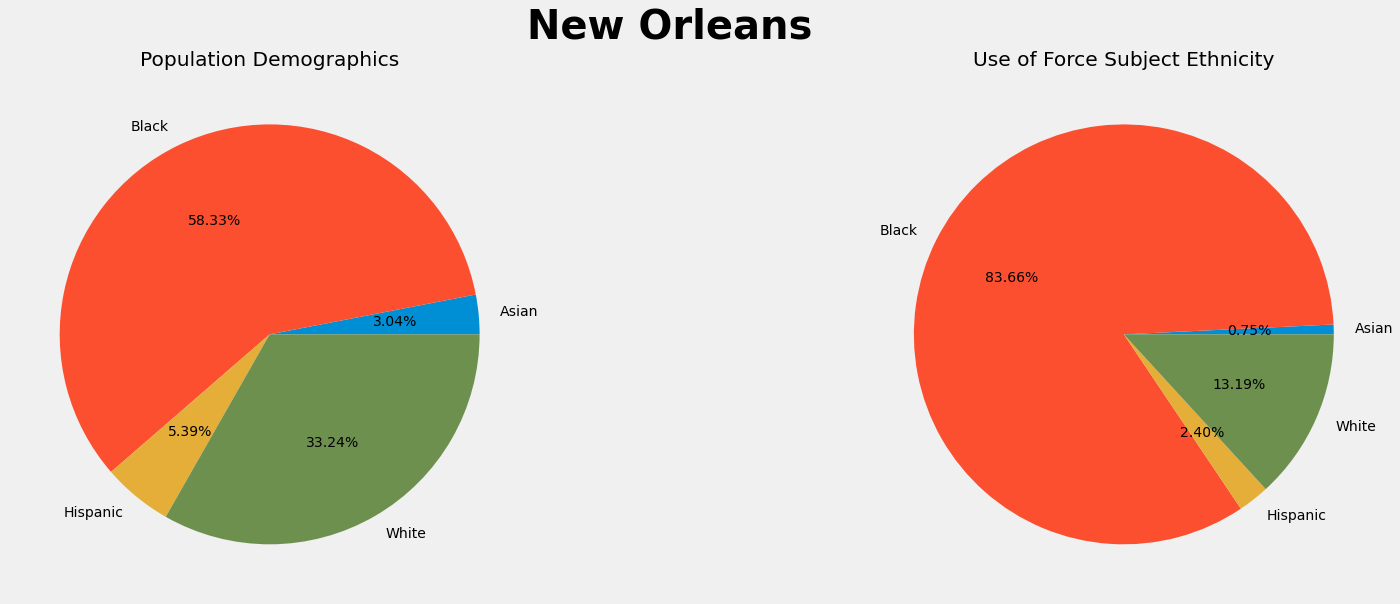

In [39]:
#New Orleans
fig, axes = plt.subplots(1,2, figsize=(25,9))
fig.suptitle('New Orleans', fontweight='bold', fontsize=40)

axes[0].pie(demographic_df['New Orleans'].sort_index(), labels=demographic_df['New Orleans'].sort_index().index, autopct='%1.2f%%')
axes[0].set_title('Population Demographics')

axes[1].pie(nopd_df['Subject Ethnicity'].value_counts().sort_index(), labels=nopd_df['Subject Ethnicity'].value_counts().sort_index().index, autopct='%1.2f%%')
axes[1].set_title('Use of Force Subject Ethnicity')

As we can see from this figure, Black people in New Orleans are more likely to be involved in police interactions involving use of force, whereas White, Hispanic, and Asian people are less likely to be involved in police interactions involving use of force. 

Text(0.5, 1.0, 'Response to Resistance Subject Ethnicity')

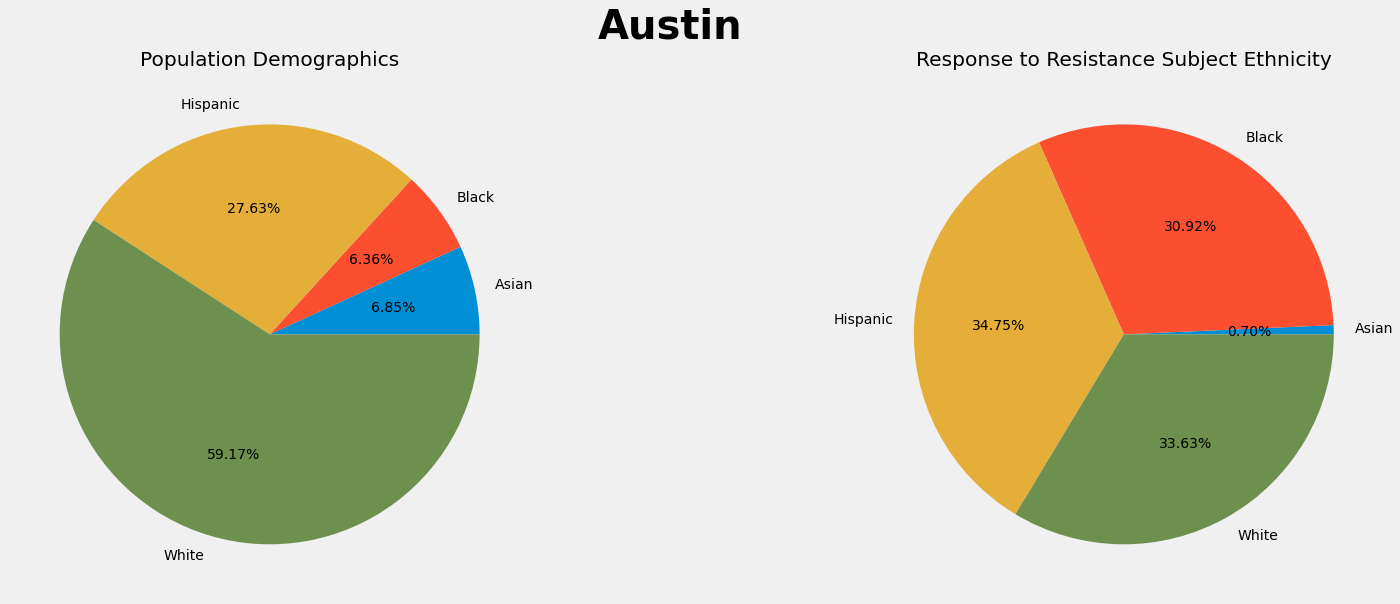

In [40]:
#Austin
fig, axes = plt.subplots(1,2, figsize=(25,9))
fig.suptitle('Austin', fontweight='bold', fontsize=40)

axes[0].pie(demographic_df['Austin'].sort_index(), labels=demographic_df['Austin'].sort_index().index, autopct='%1.2f%%')
axes[0].set_title('Population Demographics')

axes[1].pie(austin_police_df['Subject Ethnicity'].value_counts().sort_index(), labels=austin_police_df['Subject Ethnicity'].value_counts().sort_index().index, autopct='%1.2f%%')
axes[1].set_title('Response to Resistance Subject Ethnicity')

From this figure, we can see that Black and Hispanic people in Austin are more likely to be involved in police interactions involving use of force, whereas White and Asian people are less likely to be involved in police interactions involving use of force.

Text(0.5, 1.0, 'Response to Resistance Subject Ethnicity')

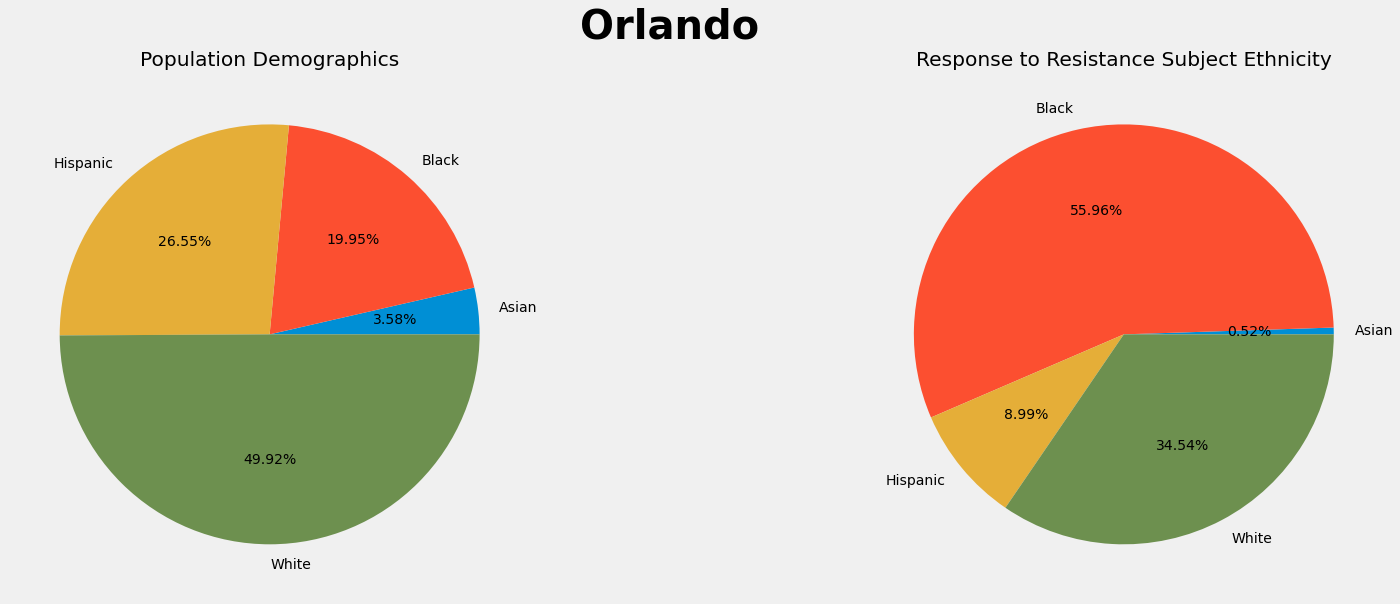

In [41]:
#Orlando
fig, axes = plt.subplots(1,2, figsize=(25,9))
fig.suptitle('Orlando', fontweight='bold', fontsize=40)

axes[0].pie(demographic_df['Orlando'].sort_index(), labels=demographic_df['Orlando'].sort_index().index, autopct='%1.2f%%')
axes[0].set_title('Population Demographics')

axes[1].pie(orlando_police_df['Subject Ethnicity'].value_counts().sort_index(), labels=orlando_police_df['Subject Ethnicity'].value_counts().sort_index().index, autopct='%1.2f%%')
axes[1].set_title('Response to Resistance Subject Ethnicity')

In this figure, we can see that Black people in New Orleans are more likely to be involved in police interactions involving use of force, whereas White, Hispanic, and Asian people are less likely to be involved in police interactions involving use of force.

To visualize the difference in ethnicity of the subject when they were injured or not, as a result of use of force, we should create a stacked bar plot from a cross-tabulation between <b>"Subject Ethnicity"</b> and <b>"Subject Injured"</b> for each city.

To create the stacked bar plot from each city, we create a crosstab with the numbers normalized, meaning that we make the numbers appear as a proportion, rather than a raw count. To find the ethnicity breakdown for both injured and not injured, we can calculate the conditional probability, ```ethnicity_given_injured``` for each ethnicity for both injured and not injured. After that, we can plot the DataFrame transposed (indicated by ```.T```) and set ```stacked=True``` to plot the stacked bar graph, as shown below. 

Text(0.5, 1.0, 'New Orleans')

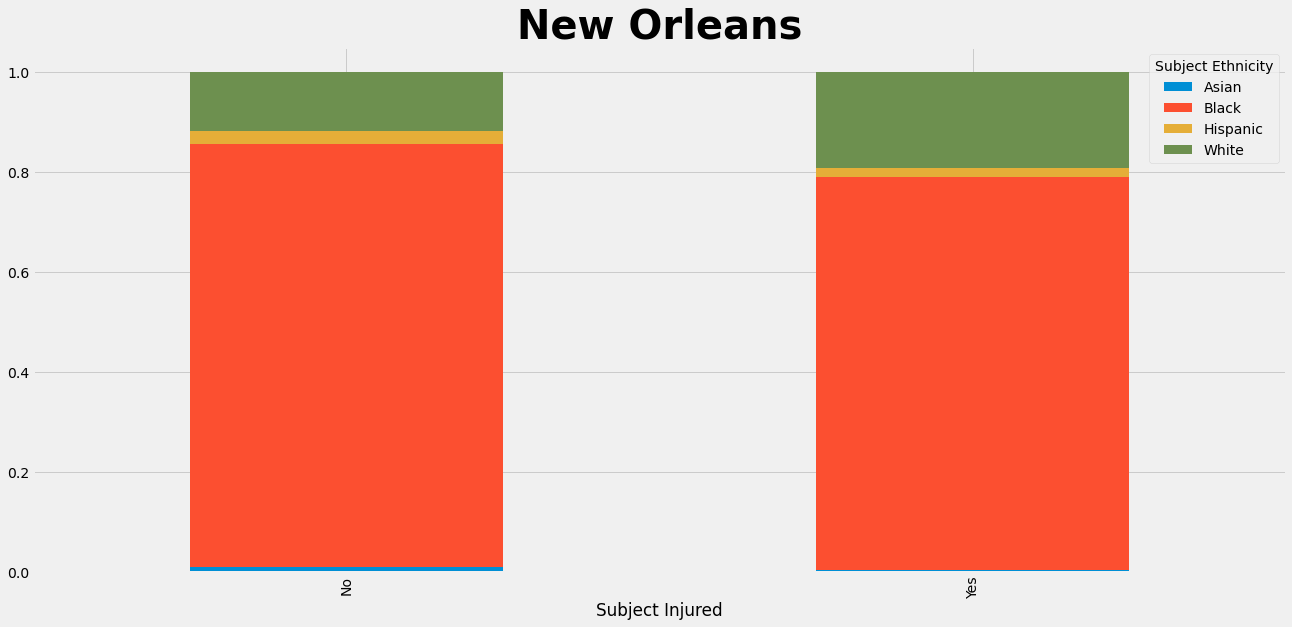

In [42]:
#New Orleans
proportions = pd.crosstab(nopd_df['Subject Ethnicity'], nopd_df['Subject Injured'],normalize=True)
ethnicity_given_injured = proportions.divide(proportions.sum(axis=0), axis=1)

#Transposing the above table to make Subject Injured the two bars to compare
(ethnicity_given_injured.T).plot.bar(stacked=True, figsize = (20, 9))
plt.title('New Orleans', fontweight='bold', fontsize=40)

From this figure, we can see that White people in police interactions involving use of force were more likely to be classified as injured than not injured, whereas Black people in police interactions were less likely to be classified as injured.

Text(0.5, 1.0, 'Austin')

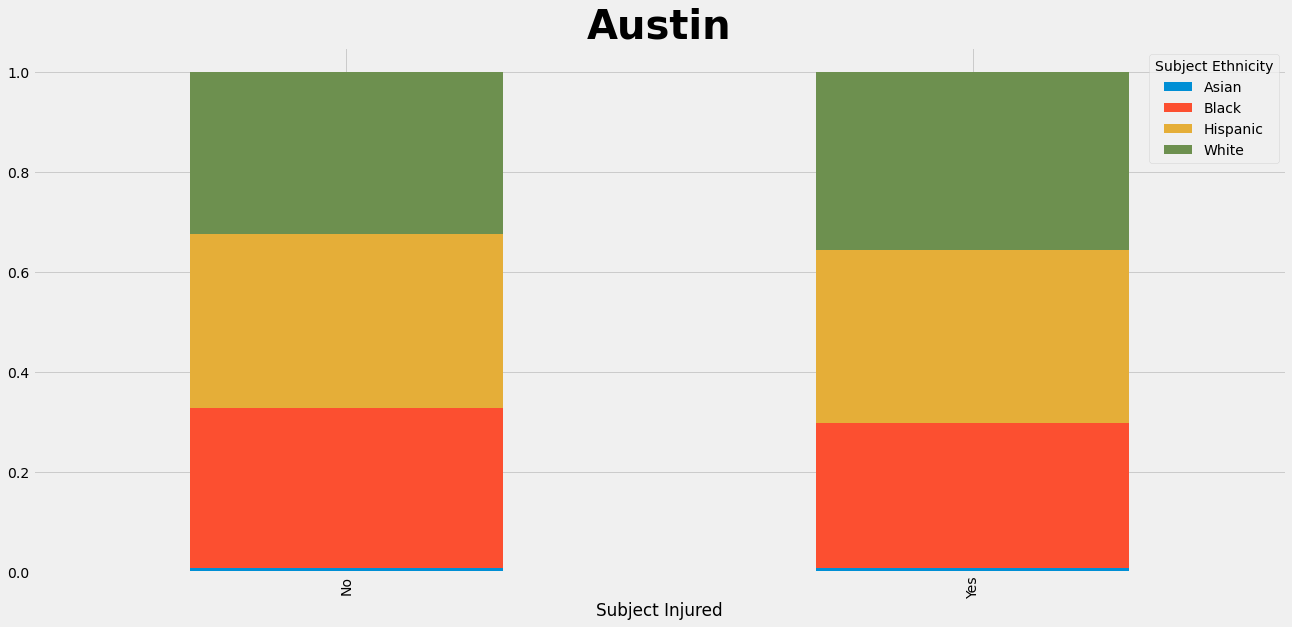

In [43]:
#Austin
proportions = pd.crosstab(austin_police_df['Subject Ethnicity'], austin_police_df['Subject Injured'],normalize=True)
ethnicity_given_injured = proportions.divide(proportions.sum(axis=0), axis=1)

#Transposing the above table to make Subject Injured the two bars to compare
(ethnicity_given_injured.T).plot.bar(stacked=True, figsize = (20, 9))
plt.title('Austin', fontweight='bold', fontsize=40)

Looking at this figure, we can see that White people in police interactions involving use of force were more likely to be classified as injured than not injured, whereas Black people in police interactions were less likely to be classified as injured. However, it not as easy to notice a difference in the two bar graphs.

Text(0.5, 1.0, 'Orlando')

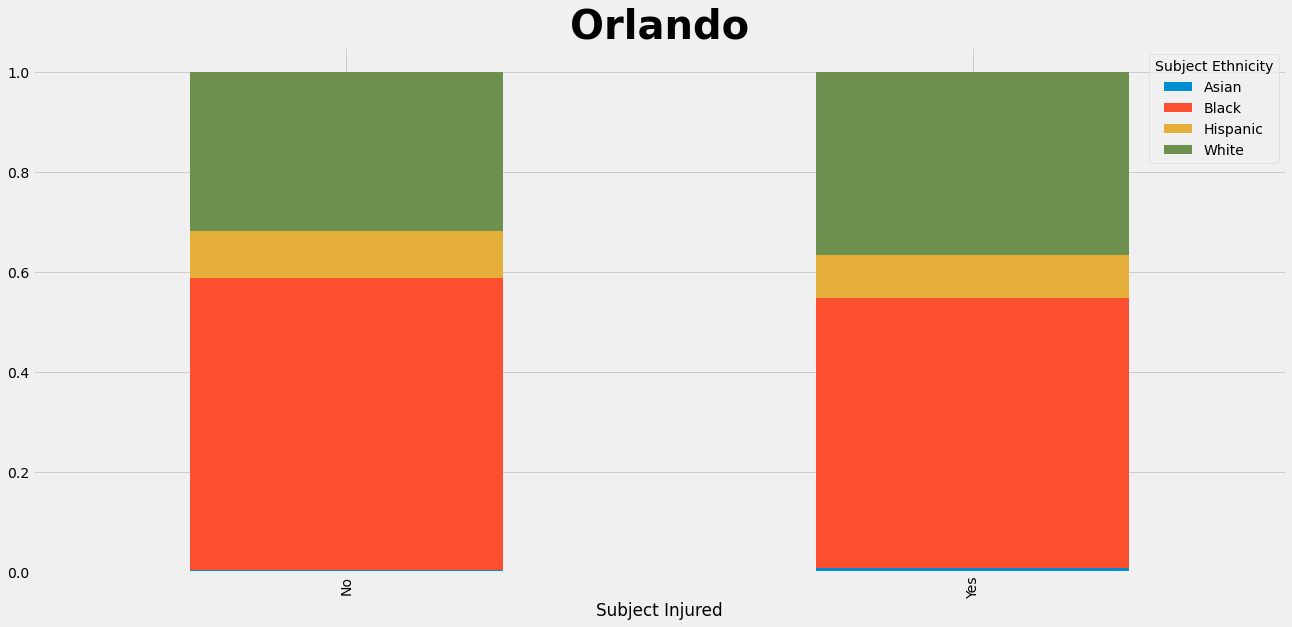

In [44]:
#Orlando
proportions = pd.crosstab(orlando_police_df['Subject Ethnicity'], orlando_police_df['Subject Injured'],normalize=True)
ethnicity_given_injured = proportions.divide(proportions.sum(axis=0), axis=1)

#Transposing the above table to make Subject Injured the two bars to compare
(ethnicity_given_injured.T).plot.bar(stacked=True, figsize = (20, 9))
plt.title('Orlando', fontweight='bold', fontsize=40)

In this figure, we can see that White people in police interactions involving use of force were more likely to be classified as injured than not injured, whereas Black people in police interactions were less likely to be classified as injured.

In the next section, we will test to see whether the differences in proprtions for each city we visualized were statistically significant. 

---

<h2 align='center'> 4. Hypothesis Testing </h2>

<p>In this section, we will conduct a hypothesis test on each visualization we created above. For each hypothesis test, the <b>null hypothesis</b> will be that there is no difference between the distributions, and the <b>alternative hypothesis</b> is that there is a different between the distributions.</p>

If the p-value generated from the hypothesis test is less than <b>0.05</b>, then we will <b>reject</b> the null hypothesis and accept the alternative hypothesis. However, if the p-value is not less than 0.05, then we will <b>fail to reject</b> the null hypothesis.

For each city, we will conduct a chi-square goodness of fit test to test whether the difference in use of force ethnic breakdown was statistically significant from the population demographics. We will also perform a chi-square test of independence for each city to see if the differences in ethnic breakdown for injury status were statistically significant for each city.

To compute the expected breakdown of use of force, based on population ethnic breakdown, we multiply each row in the demographic DataFrame by the number of values in each city's police data. We will compare this to the actual breakdown, which we can compute just by using ```.value_counts()``` in the <b>Subject Ethnicity</b> column.

We start by creating an empty DataFrame, then adding the expected and actual breakdown for each city as columns, with the resulting DataFrame shown below.

In [45]:
expected_actual_df = pd.DataFrame()

#New Orleans
expected_actual_df['New Orleans Expected'] = demographic_df['New Orleans'] * nopd_df["Subject Ethnicity"].value_counts().sum() 
expected_actual_df['New Orleans Actual'] = nopd_df["Subject Ethnicity"].value_counts() 

#Austin
expected_actual_df['Austin Expected'] = demographic_df['Austin'] * austin_police_df["Subject Ethnicity"].value_counts().sum() 
expected_actual_df['Austin Actual'] = austin_police_df["Subject Ethnicity"].value_counts() 

#Orlando
expected_actual_df['Orlando Expected'] = demographic_df['Orlando'] * austin_police_df["Subject Ethnicity"].value_counts().sum() 
expected_actual_df['Orlando Actual'] = austin_police_df["Subject Ethnicity"].value_counts() 

expected_actual_df

,New Orleans Expected,New Orleans Actual,Austin Expected,Austin Actual,Orlando Expected,Orlando Actual
Ethnicity,,,,,,
Asian,101.175490,25,214.347188,22,112.185668,22
Black,1941.916667,2785,199.036675,968,624.670195,968
Hispanic,179.504902,80,865.044010,1088,831.193811,1088
White,1106.402941,439,1852.572127,1053,1562.950326,1053


For each city, we can perform the chi-square goodness of fit test by calling ```chisquare()``` from the ```scipy.stats``` library. The two parameters we enter are the actual frequencies and the expected frequencies. The test will give us the chi-square test statistic (the higher the test statistic, the lower the p-value), and the p-value, which we will compare to 0.05 to determine whether or not we <b> reject </b> the null hypothesis.

In [46]:
#New Orleans
stats.chisquare(f_obs=expected_actual_df['New Orleans Actual'], f_exp=expected_actual_df['New Orleans Expected'])

Power_divergenceResult(statistic=881.1260543949766, pvalue=1.0986503289423765e-190)

For New Orleans, since the chi-squared test statistic is 881.13, and the p-value is well below 0.05 ( 1.0 * 10<sup>-190</sup>), we <b>reject</b> the null hypothesis which is that there is no relation between the ethnic breakdown of police use of force cases and the population ethnic breakdown.

In [47]:
#Austin
stats.chisquare(f_obs=expected_actual_df['Austin Actual'], f_exp=expected_actual_df['Austin Expected'])

Power_divergenceResult(statistic=3545.9983249139045, pvalue=0.0)

For Austin, since the chi-squared test statistic is 3546, and the p-value is well below 0.05 (0), we <b>reject</b> the null hypothesis which is that there is no relation between the ethnic breakdown of police response to resistance interactions and the population ethnic breakdown.

In [48]:
#Orlando
stats.chisquare(f_obs=expected_actual_df['Orlando Actual'], f_exp=expected_actual_df['Orlando Expected'])

Power_divergenceResult(statistic=506.9267173440385, pvalue=1.504973371870972e-109)

For Orlando, since the chi-squared test statistic is 506.93, and the pvalue is well below 0.05 (1.5 * 10<sup>109</sup>), we <b>reject</b> the null hypothesis which is that there is no relation between the ethnic breakdown of police response to resistance interactions and the population ethnic breakdown.

We will also perform a chi-square test of independence for each city to see if ethnicity is independent of whether or not the subject was injured in use of force or response to resistance cases.

All we need to do is create a contingency table (or cross-tabulation), between subject ethnicity and whether or not the subject was injured, and input the table into ```chi2_contingency()``` from ```scipy.stats```. This test will give us the chi-square test statistic (the higher the value, the lower the p-value), the p-value, and an array showing the expected ethnic breakdown if ethnicity and whether or not the subject was injured was truly independent. Once again, we will compare the p-value to 0.05 to determine whether or not we <b> reject </b> the null hypothesis.

In [49]:
#New Orleans
counts = pd.crosstab(nopd_df['Subject Ethnicity'], nopd_df['Subject Injured'])
counts

Subject Injured,No,Yes
Subject Ethnicity,,
Asian,23,2
Black,2309,476
Hispanic,70,10
White,322,117


In [50]:
stats.chi2_contingency(counts)

(26.88239033818125,
 6.231240509265799e-06,
 3,
 array([[  20.45659357,    4.54340643],
        [2278.86452388,  506.13547612],
        [  65.46109943,   14.53890057],
        [ 359.21778312,   79.78221688]]))

For New Orleans, since the chi-squared test statistic is 26.8, and the p-value is well below 0.05 (0.000006), we <b>reject</b> the null hypothesis which is that subject ethnicity is independent of whether or not they were injured from the police encounter.

In [51]:
counts = pd.crosstab(austin_police_df['Subject Ethnicity'], austin_police_df['Subject Injured'])
counts

Subject Injured,No,Yes
Subject Ethnicity,,
Asian,13,9
Black,642,322
Hispanic,695,385
White,648,395


In [52]:
stats.chi2_contingency(counts)

(4.616954706374223,
 0.20209243688543524,
 3,
 array([[ 14.13830814,   7.86169186],
        [619.51495658, 344.48504342],
        [694.06239949, 385.93760051],
        [670.2843358 , 372.7156642 ]]))

For Austin, since the chi-squared test statistic is 4.62, and the p-value is not below 0.05 (0.20), we <b>fail to reject</b> the null hypothesis which is that subject ethnicity is independent of whether or not they were injured from the police encounter.

In [53]:
counts = pd.crosstab(orlando_police_df['Subject Ethnicity'], orlando_police_df['Subject Injured'])
counts

Subject Injured,No,Yes
Subject Ethnicity,,
Asian,7,19
Black,1308,1500
Hispanic,209,242
White,715,1018


In [54]:
stats.chi2_contingency(counts)

(16.134260665372548,
 0.0010643270797478606,
 3,
 array([[  11.60103627,   14.39896373],
        [1252.9119171 , 1555.0880829 ],
        [ 201.2333599 ,  249.7666401 ],
        [ 773.25368673,  959.74631327]]))

For Orlando, since the chi-squared test statistic is 16.1, and the p-value is below 0.05 (0.001), we <b>fail to reject</b> the null hypothesis which is that subject ethnicity is independent of whether or not they were injured from the police encounter.

---


<h2 align='center'> 5. Conclusion and Further Study </h2>


<p>We plan to use the data from Austin and Orlando to compare to New Orleans. According to the New Orleans Data Center, Austin and Orlando are two cities that New Orleans aspires to be like due to the growth of their economy and opportunities. We believe that the use of force by police and whether they proportionately act might effect how citizens trust their government. There are opportunities here to include economic data as well. However, for now, we hope to search deeper in whether currently, each city proportionately uses force on criminals based on chi-squared tests or other tests of proportions. We believe that the relationship between the government and its citizens is very important in a city's growth and prosperity and we hope to shine a light on this relationship in New Orleans. </p>
<p>In conclusion, we found that in all cities, the proportion of Black people who were involved in use of force incidents was disproportional to the given city's demographic. So, there are no avenues of further policy research because this is a consistent issue accross evey city that we analyzed. Despite this, we found that Austin </p>